DF SHAPE: (286662, 15)
TIERS: ['GOLD' 'BRONZE' 'IRON' 'EMERALD' 'SILVER' 'PLATINUM' 'DIAMOND'
 'CHALLENGER' 'MASTER' 'GRANDMASTER']


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


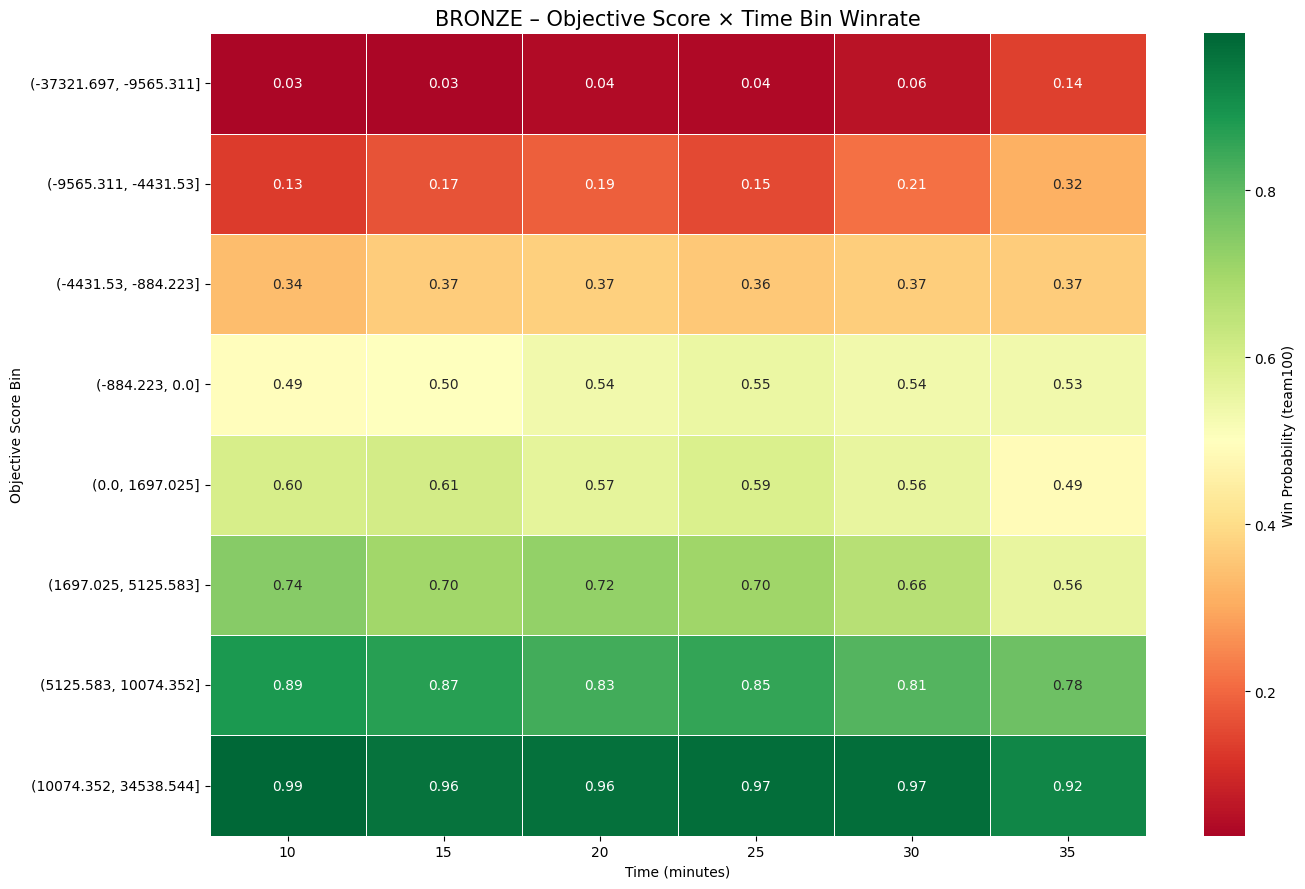

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


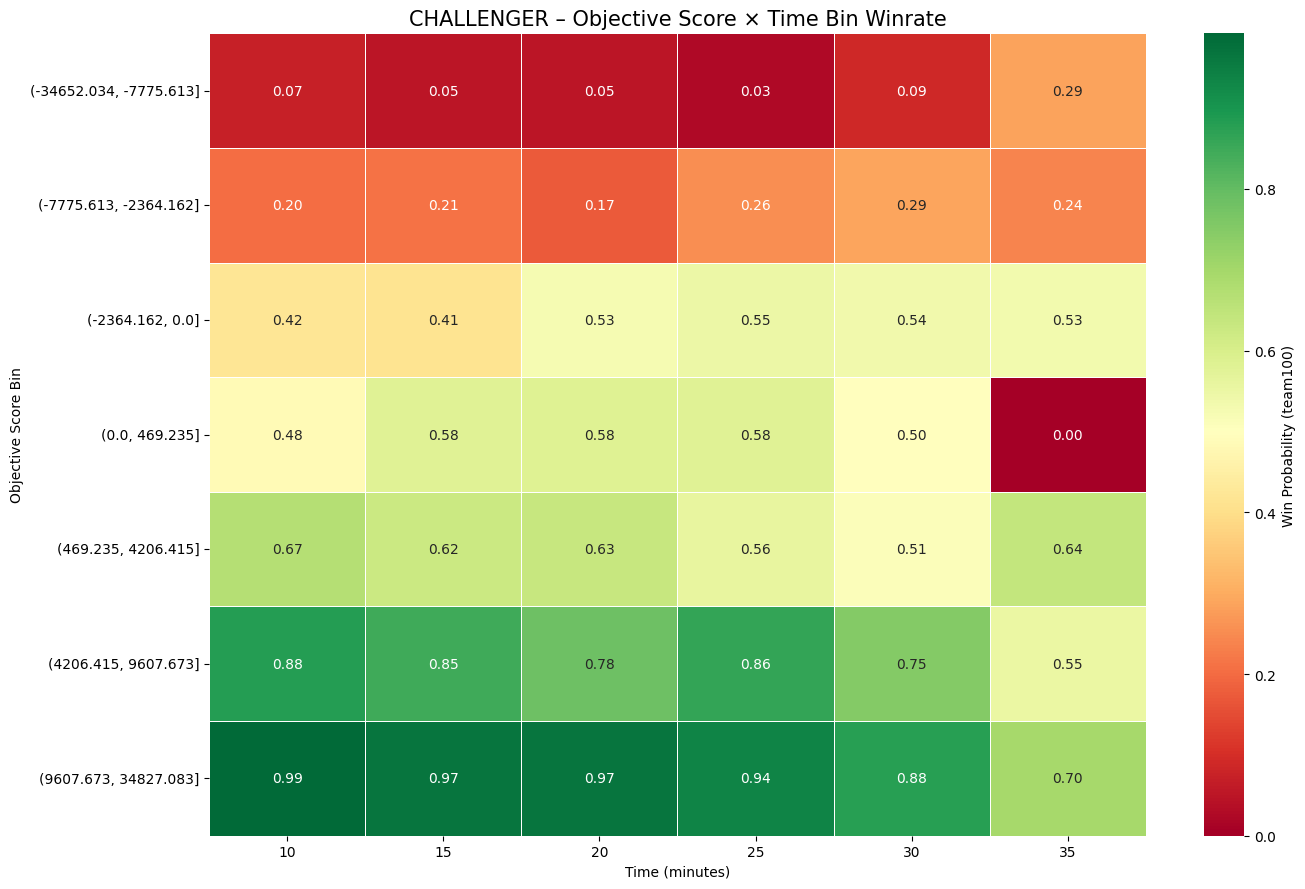

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


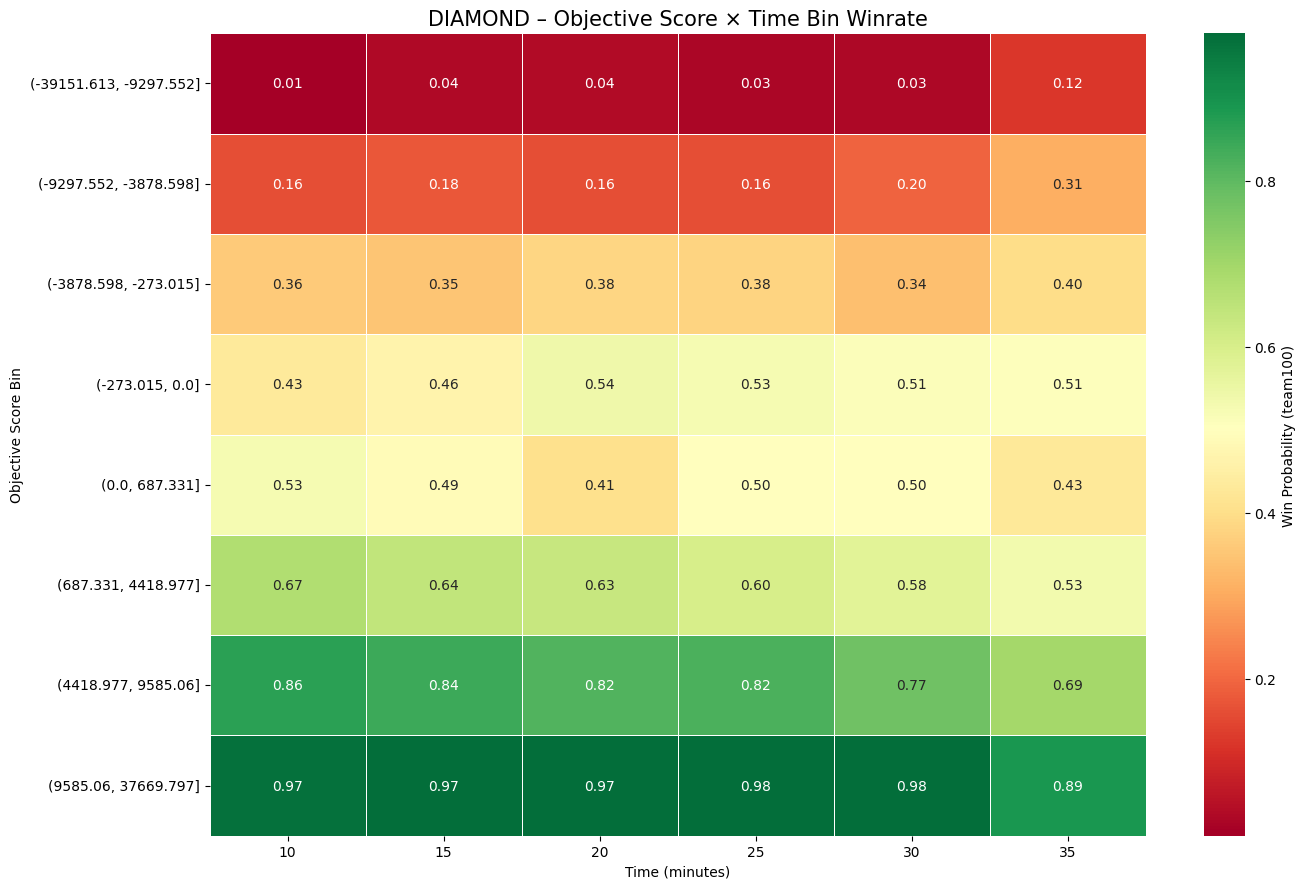

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


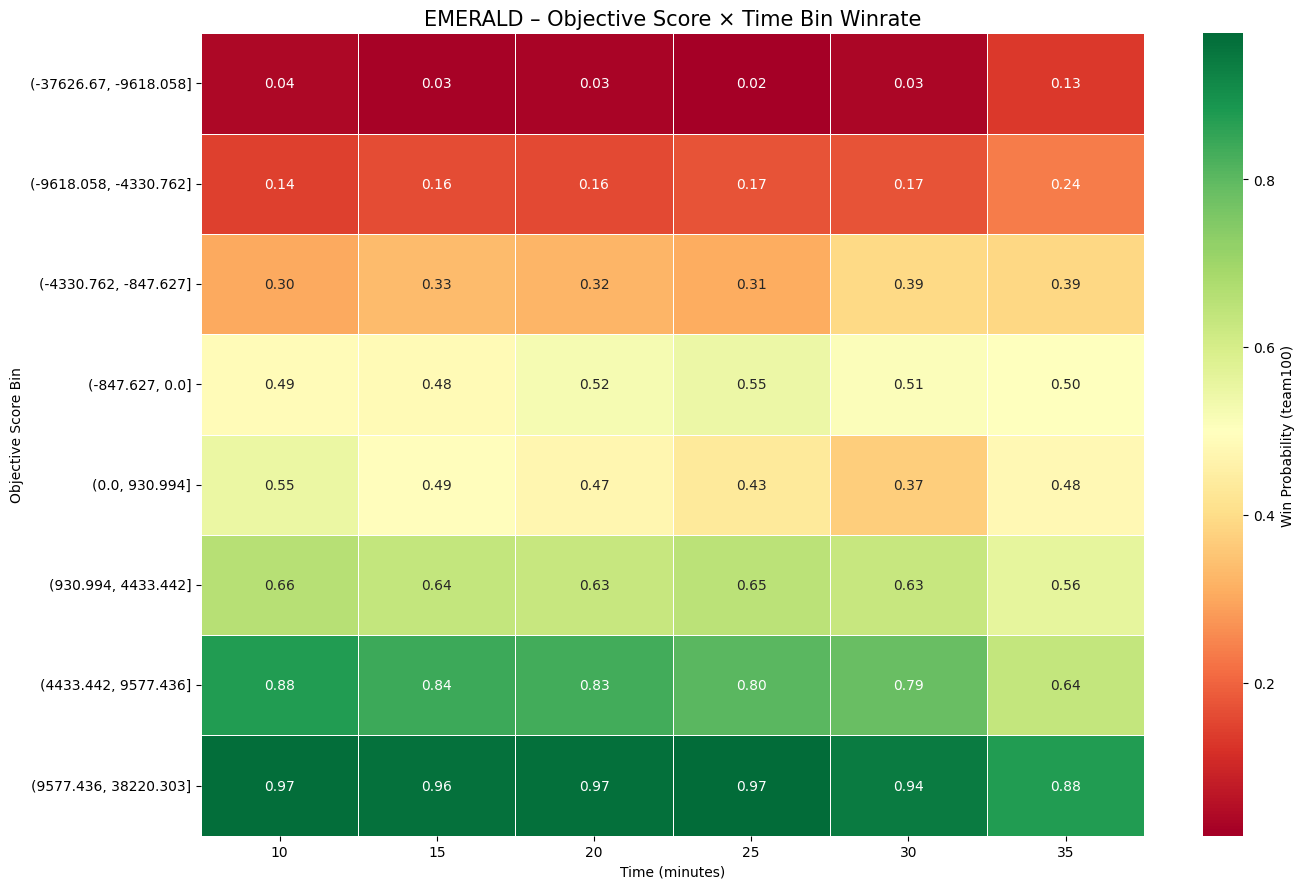

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


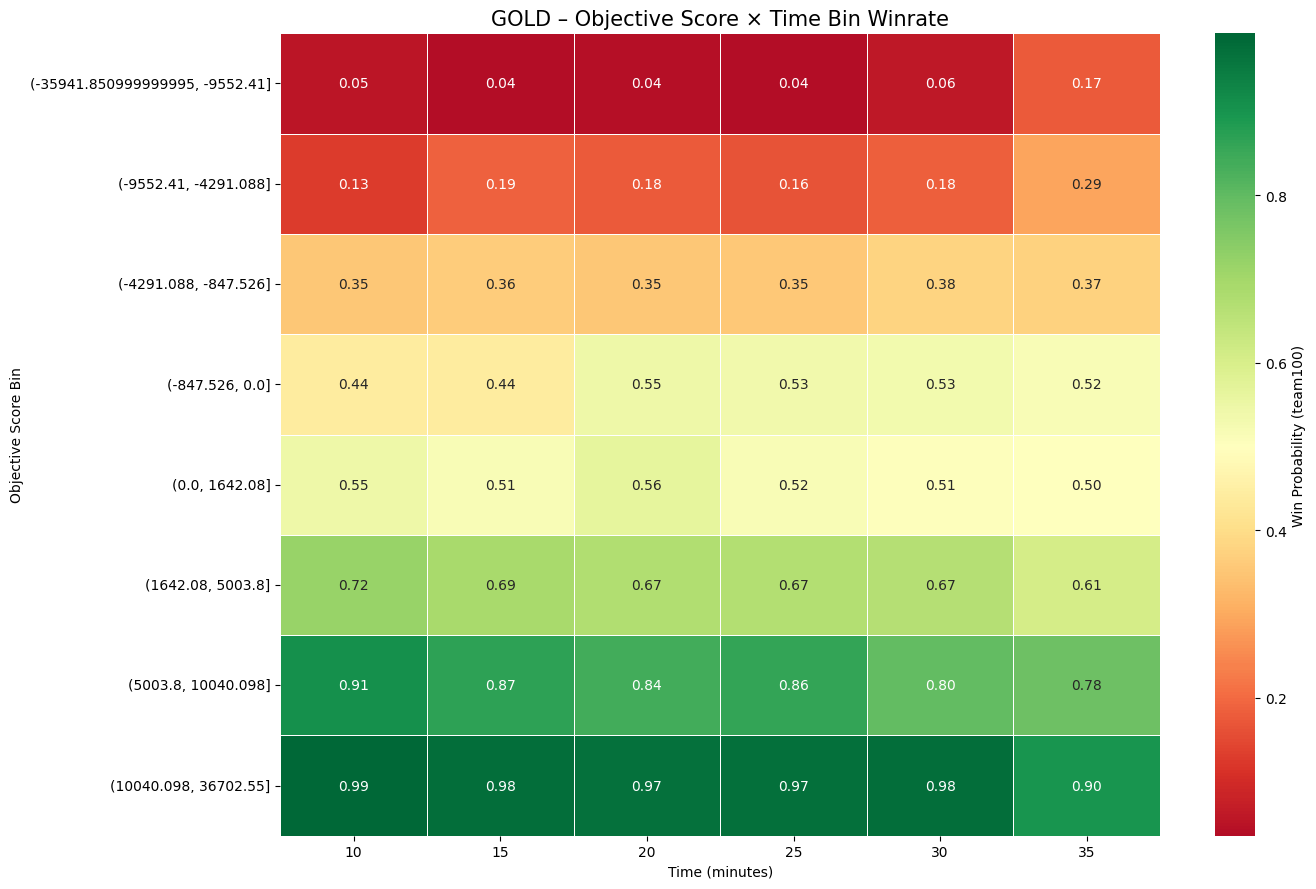

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


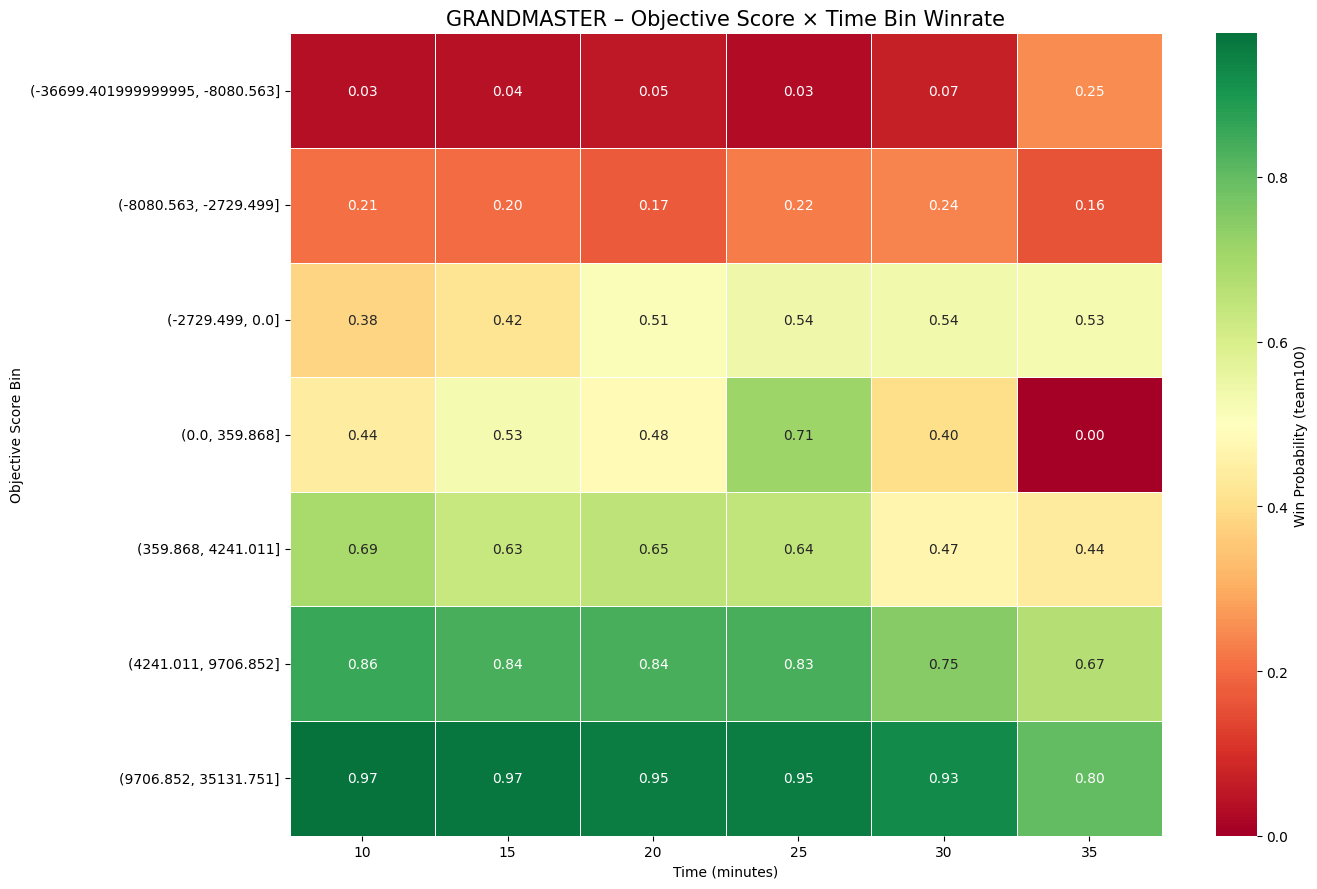

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


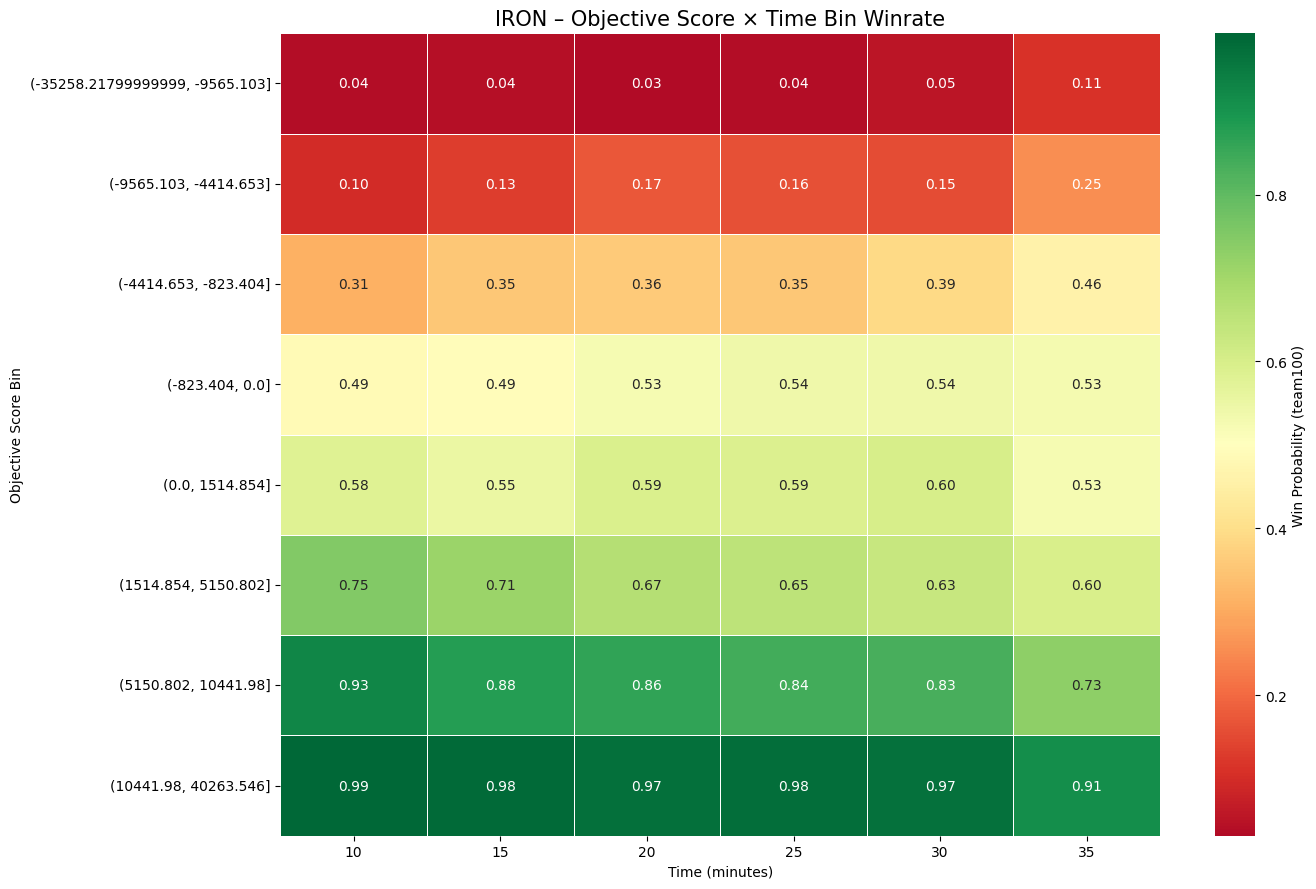

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


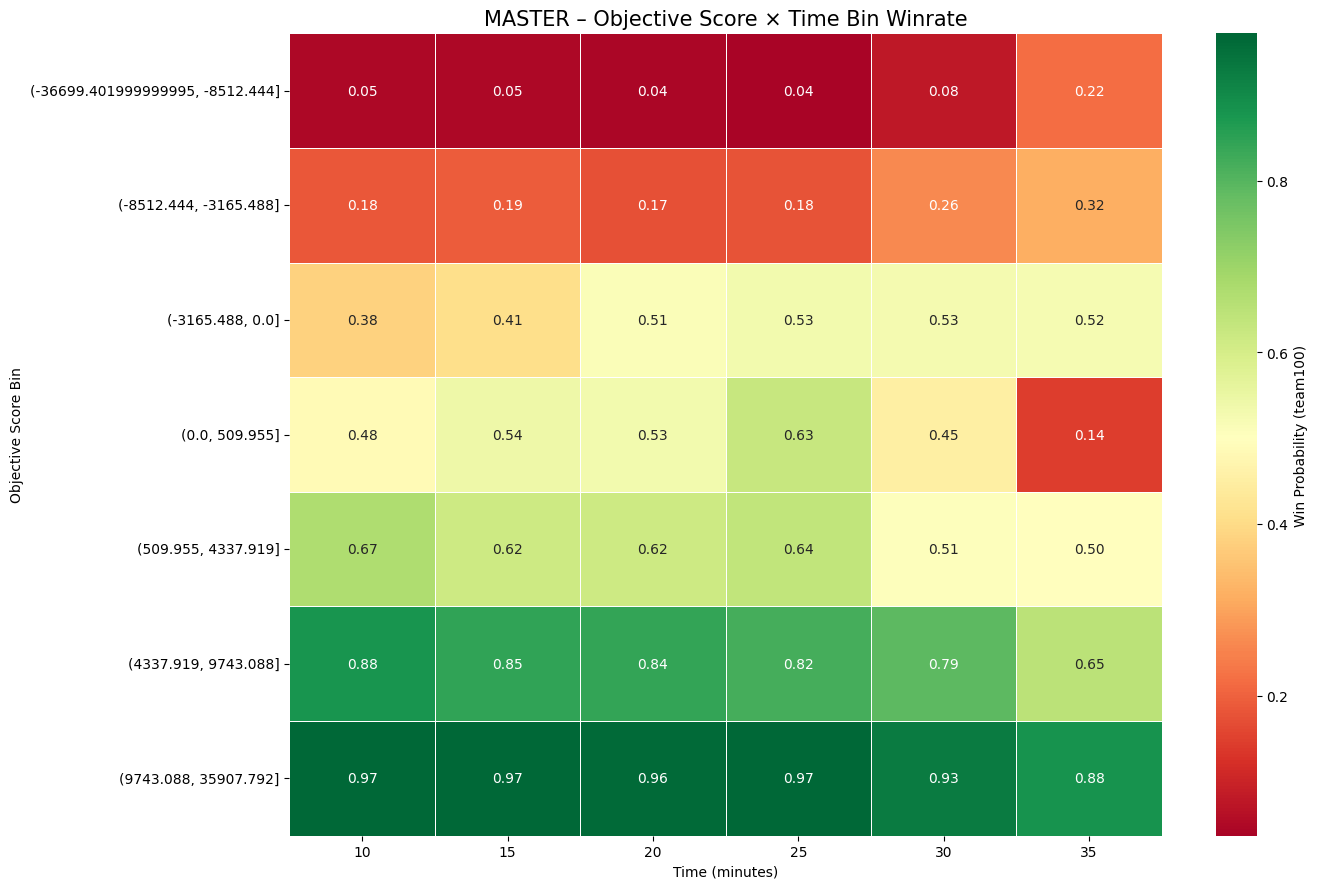

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


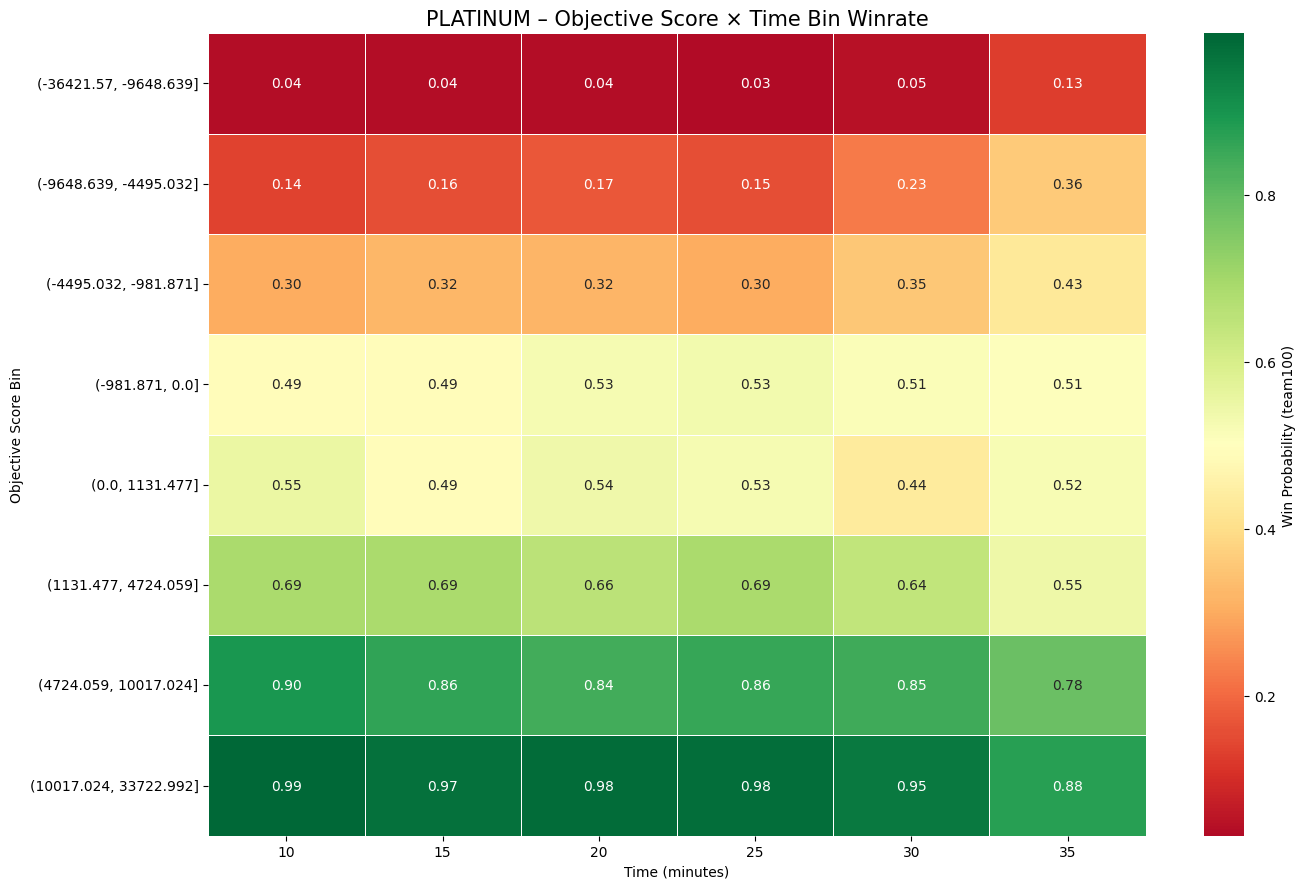

C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\3008932620.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"])


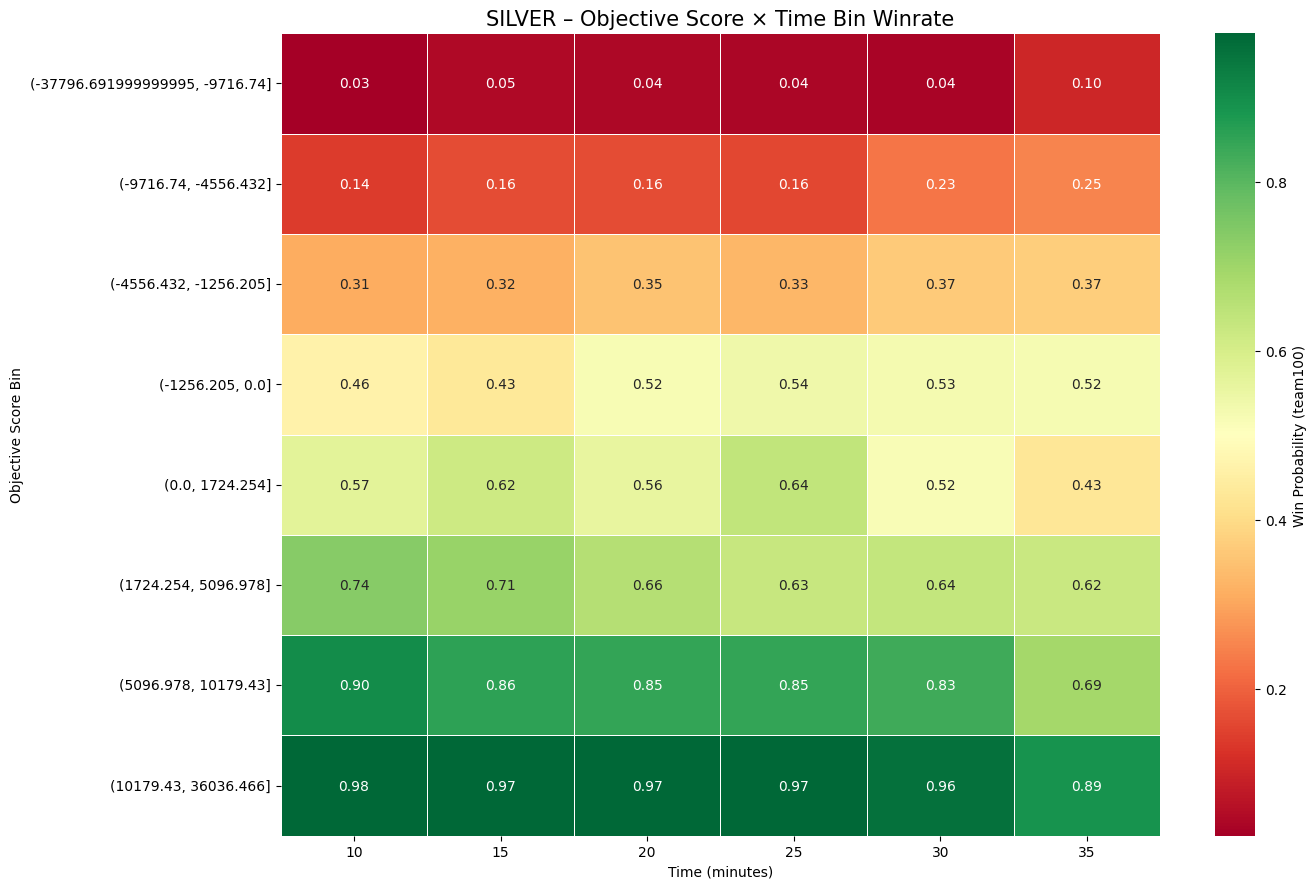

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. 캐시된 DF 로드
# ===============================
DF_PATH = r"C:\dev\LOL_Tier_Winrate_Analysis\data\temp\final_df_timebin_team100.csv"
df = pd.read_csv(DF_PATH)

print("DF SHAPE:", df.shape)
print("TIERS:", df["tier"].unique())

# ===============================
# 2. Objective 가중치 (ML 결과 고정)
# ===============================
OBJECTIVE_WEIGHTS = {
    "goldDiff":        1.966382,
    "dragonDiff":      0.453609,
    "atakhanDiff":     0.269063,
    "innerTowerDiff":  0.211389,
    "totalKillDiff":  -0.123464,
    "grubDiff":        0.076683,
    "baseTowerDiff":  -0.049228,
    "baronDiff":      -0.023188,
    "outerTowerDiff":  0.021663,
    "heraldDiff":      0.007904,
    "elderDiff":       0.007325,
}

FEATURES = list(OBJECTIVE_WEIGHTS.keys())

# ===============================
# 3. Objective Score 계산
# ===============================
df["objective_score"] = 0.0
for f, w in OBJECTIVE_WEIGHTS.items():
    df["objective_score"] += w * df[f]

# ===============================
# 4. 티어별 히트맵
# ===============================
for tier in sorted(df["tier"].unique()):
    tier_df = df[df["tier"] == tier].copy()

    if len(tier_df) < 1000:
        print(f"[SKIP] {tier} (too small)")
        continue

    # score bin (티어 내부 기준)
    tier_df["score_bin"] = pd.qcut(
        tier_df["objective_score"],
        q=10,
        duplicates="drop"
    )

    # heatmap data
    heatmap_df = (
        tier_df
        .groupby(["time_bin", "score_bin"])
        .agg(winrate=("win", "mean"))
        .reset_index()
    )

    heatmap_pivot = heatmap_df.pivot(
        index="score_bin",
        columns="time_bin",
        values="winrate"
    )

    # ===============================
    # 시각화
    # ===============================
    plt.figure(figsize=(14, 9))

    sns.heatmap(
        heatmap_pivot,
        cmap="RdYlGn",
        center=0.5,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "Win Probability (team100)"}
    )

    plt.title(f"{tier} – Objective Score × Time Bin Winrate", fontsize=15)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Objective Score Bin")
    plt.tight_layout()
    plt.show()


In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 티어별 히트맵 저장 전용 셀
# ===============================

SAVE_BASE_DIR = r"C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all"
os.makedirs(SAVE_BASE_DIR, exist_ok=True)

for tier in sorted(df["tier"].unique()):
    tier_df = df[df["tier"] == tier].copy()

    # 데이터 너무 적으면 스킵
    if len(tier_df) < 1000:
        print(f"[SKIP] {tier} (too small)")
        continue

    # tier 내부 기준 score bin
    tier_df["score_bin"] = pd.qcut(
        tier_df["objective_score"],
        q=10,
        duplicates="drop"
    )

    heatmap_df = (
        tier_df
        .groupby(["time_bin", "score_bin"], as_index=False)
        .agg(winrate=("win", "mean"))
    )

    heatmap_pivot = heatmap_df.pivot(
        index="score_bin",
        columns="time_bin",
        values="winrate"
    )

    # ===============================
    # 저장용 히트맵
    # ===============================
    plt.figure(figsize=(14, 9))

    sns.heatmap(
        heatmap_pivot,
        cmap="RdYlGn",
        center=0.5,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "Win Probability (team100)"}
    )

    plt.title(f"{tier} – Objective Score × Time Bin Winrate", fontsize=15)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Objective Score Bin")
    plt.tight_layout()

    save_path = os.path.join(SAVE_BASE_DIR, f"{tier}.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"[SAVE] {tier} heatmap → {save_path}")


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] BRONZE heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\BRONZE.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] CHALLENGER heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\CHALLENGER.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] DIAMOND heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\DIAMOND.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] EMERALD heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\EMERALD.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] GOLD heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\GOLD.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] GRANDMASTER heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\GRANDMASTER.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] IRON heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\IRON.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] MASTER heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\MASTER.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] PLATINUM heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\PLATINUM.png


C:\Users\yt582\AppData\Local\Temp\ipykernel_6964\2319275675.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_bin", "score_bin"], as_index=False)


[SAVE] SILVER heatmap → C:\dev\LOL_Tier_Winrate_Analysis\data\analysis\graph\all\SILVER.png
